In [37]:
%reset -f

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv("training_set_VU_DM.csv", index_col=0)
df_test = pd.read_csv("test_set_VU_DM.csv", index_col=0)

# 1.Business Understanding

Blah blah

# 2. EDA

## Descriptive Statistics


In [40]:
# # Print the descriptive statistics for all numeric columns
# print(X.describe())
#
# # Print the frequency of each category for all categorical columns
# for col in X.select_dtypes(include=['object']):
#     print(X[col].value_counts())

## Distribution of Variables

In [41]:
# for col in X.select_dtypes(include=['int64', 'float64']):
#     plt.figure(figsize=(10, 5))
#     sns.histplot(X[col], kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.show()

## Missing Values

In [42]:
# print(X.isnull().sum())

## Correlation Analysis

In [43]:
# corr_matrix = X.corr()
# plt.figure(figsize=(30, 15))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f")
# plt.show()

## Visualize User Behavior

In [44]:
# # Example: Click-through rate by position
# click_rate_by_position = X.groupby('position')['click_bool'].mean()
# plt.figure(figsize=(10, 5))
# click_rate_by_position.plot(kind='bar')
# plt.title("Click-through Rate by Position")
# plt.show()

## Temporal Analysis

In [45]:
# # Assuming 'date_time' is a string, convert it to a datetime object
# X['date_time'] = pd.to_datetime(X['date_time'])
#
# # Example: Click-through rate by hour of the day
# X['hour'] = X['date_time'].dt.hour
# click_rate_by_hour = X.groupby('hour')['click_bool'].mean()
# plt.figure(figsize=(10, 5))
# click_rate_by_hour.plot(kind='line')
# plt.title("Click-through Rate by Hour of the Day")
# plt.show()

## Investigate the Target Variable

In [46]:
# # Print the frequency of each class in the target variable
# print(X['click_bool'].value_counts())
#
# # Plot the distribution of the target variable
# plt.figure(figsize=(10, 5))
# sns.countplot(x='click_bool', data=X)
# plt.title("Distribution of Clicks")
# plt.show()

# 2.Data preparation

## Price USD analysis

                   date_time  site_id  visitor_location_country_id  \
srch_id                                                              
1        2013-04-04 08:32:15       12                          187   
1        2013-04-04 08:32:15       12                          187   
1        2013-04-04 08:32:15       12                          187   
1        2013-04-04 08:32:15       12                          187   
1        2013-04-04 08:32:15       12                          187   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
srch_id                                                                   
1                            NaN                   NaN              219   
1                            NaN                   NaN              219   
1                            NaN                   NaN              219   
1                            NaN                   NaN              219   
1                            NaN                   NaN     

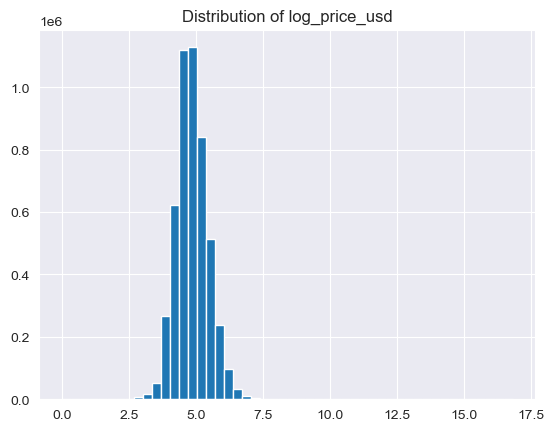

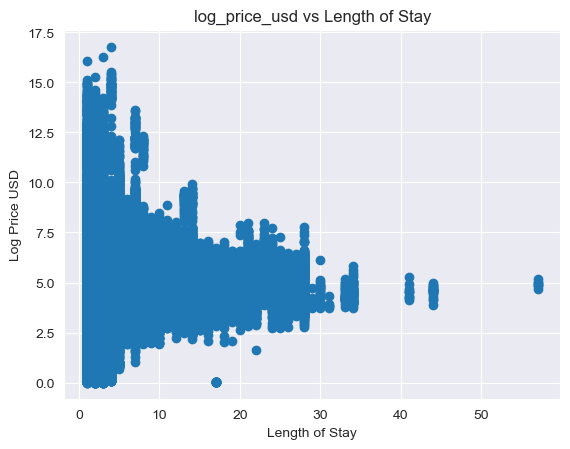

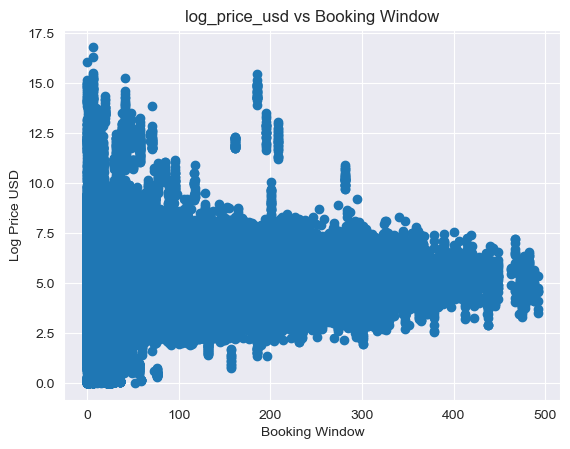

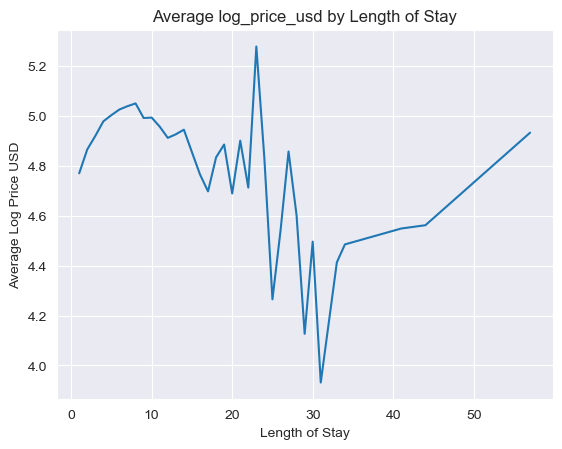

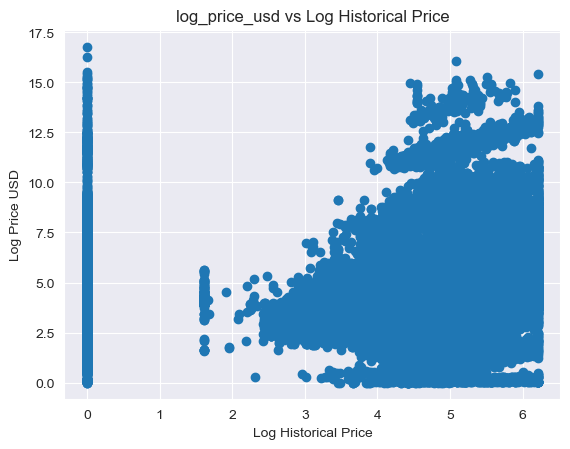

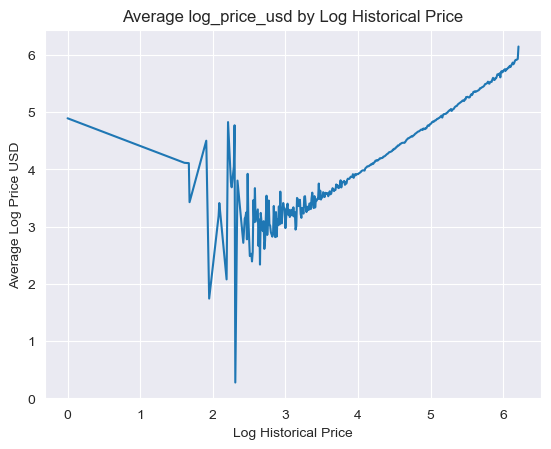

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Look at the first few rows of the DataFrame
print(df.head())

# Check the summary statistics for the numeric columns
print(df.describe())

# Apply log transformation to 'price_usd'
df['log_price_usd'] = np.log1p(df['price_usd'])

# Look at the distribution of log_price_usd
plt.hist(df['log_price_usd'], bins=50)
plt.title('Distribution of log_price_usd')
plt.show()

# Look at the relationship between log_price_usd and srch_length_of_stay
plt.scatter(df['srch_length_of_stay'], df['log_price_usd'])
plt.title('log_price_usd vs Length of Stay')
plt.xlabel('Length of Stay')

plt.ylabel('Log Price USD')
plt.show()

# Look at the relationship between log_price_usd and srch_booking_window
plt.scatter(df['srch_booking_window'], df['log_price_usd'])
plt.title('log_price_usd vs Booking Window')
plt.xlabel('Booking Window')
plt.ylabel('Log Price USD')
plt.show()

# Group by srch_length_of_stay and find the average log price
grouped = df.groupby('srch_length_of_stay')['log_price_usd'].mean()
plt.plot(grouped)
plt.title('Average log_price_usd by Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Average Log Price USD')
plt.show()

# Look at the relationship between log_price_usd and prop_log_historical_price
plt.scatter(df['prop_log_historical_price'], df['log_price_usd'])
plt.title('log_price_usd vs Log Historical Price')
plt.xlabel('Log Historical Price')
plt.ylabel('Log Price USD')
plt.show()

# Group by prop_log_historical_price and find the average log price
grouped = df.groupby('prop_log_historical_price')['log_price_usd'].mean()
plt.plot(grouped)
plt.title('Average log_price_usd by Log Historical Price')
plt.xlabel('Log Historical Price')
plt.ylabel('Average Log Price USD')
plt.show()

## Create 2 .csv files containing price_usd information

In [49]:
# Assuming you have a DataFrame named 'df' containing the relevant columns

# Calculate the minimum and maximum price per property
property_price_range = df.groupby('prop_id')['price_usd'].agg(['min', 'max']).reset_index()
property_price_range.rename(columns={'min': 'min_price', 'max': 'max_price'}, inplace=True)

# Calculate the minimum and maximum length of stay per property
property_length_of_stay = df.groupby('prop_id')['srch_length_of_stay'].agg(['min', 'max']).reset_index()
property_length_of_stay.rename(columns={'min': 'min_length_of_stay', 'max': 'max_length_of_stay'}, inplace=True)

# Merge the price and length of stay information based on the property ID
property_info = pd.merge(property_price_range, property_length_of_stay, on='prop_id')

# Display the property information
print(property_info)

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)

# Assuming you have a DataFrame named 'df' containing the relevant columns

# Convert 'date_time' to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract the month from the 'date_time' feature
df['month'] = df['date_time'].dt.month

# Convert 'prop_log_historical_price' back to 'prop_historical_price'
df['prop_historical_price'] = (np.exp(df['prop_log_historical_price']))

# Calculate the minimum and maximum price per property and month
property_price_range = df.groupby(['prop_id', 'month'])['price_usd'].agg(['min', 'max']).reset_index()
property_price_range.rename(columns={'min': 'min_price', 'max': 'max_price'}, inplace=True)

# Calculate the minimum and maximum length of stay per property
property_length_of_stay = df.groupby(['prop_id', 'month'])['srch_length_of_stay'].agg(['min', 'max']).reset_index()
property_length_of_stay.rename(columns={'min': 'min_length_of_stay', 'max': 'max_length_of_stay'}, inplace=True)

# Merge the price and length of stay information based on the property ID and month
property_info = pd.merge(property_price_range, property_length_of_stay, on=['prop_id', 'month'])

# Fetch the 'site_id', 'prop_historical_price' and 'visitor_hist_adr_usd' features
additional_info = df[['prop_id', 'month', 'site_id', 'prop_historical_price', 'visitor_hist_adr_usd']].drop_duplicates()

# Merge the additional info with property_info
property_info = pd.merge(property_info, additional_info, on=['prop_id', 'month'])

# Calculate the ratio of min_price to min_length_stay and max_price to max_length_of_stay
property_info['min_price_ratio'] = property_info['min_price'] / property_info['min_length_of_stay']
property_info['max_price_ratio'] = property_info['max_price'] / property_info['max_length_of_stay']

# Check if the calculated price per night for the minimum and maximum length of stay is greater than the maximum price
property_info['price_per_night'] = np.where(((property_info['min_price_ratio'] * property_info['max_length_of_stay']) > property_info['max_price']) | (property_info['min_length_of_stay'] == property_info['max_length_of_stay']), 1, 0)


# Properties where price_per_stay is 1 are likely to be priced per stay
price_per_night_properties = property_info[property_info['price_per_night'] == 1]

# Display the properties likely to be priced per stay
print(property_info)

# Define function to calculate average price
def calculate_avg_price(row):
    if row['price_per_night'] == 1:
        return (row['min_price'] + row['max_price']) / 2
    elif row['price_per_night'] == 0:
        return ((row['min_price'] / row['min_length_of_stay']) + (row['max_price'] / row['max_length_of_stay'])) / 2
    else:
        return np.nan

# Apply the function to each row
property_info['avg_price'] = property_info.apply(calculate_avg_price, axis=1)

# Save the updated property information into 'property_info.csv'
property_info.to_csv('property_info.csv', index=False)

        prop_id  min_price  max_price  min_length_of_stay  max_length_of_stay
0             1      72.00     117.00                   1                   5
1             2      93.00      97.00                   1                   5
2             3      89.46     667.00                   1                   6
3             4     147.45    1050.87                   1                  14
4             5     225.22     931.00                   1                   9
...         ...        ...        ...                 ...                 ...
129108   140817      65.00      97.45                   1                  14
129109   140818      71.00      83.35                   1                  14
129110   140819      65.77      70.47                   5                   5
129111   140820      97.00     235.80                   1                  10
129112   140821      59.02     113.09                   1                   7

[129113 rows x 5 columns]
         prop_id  month  min_price  m

### Break down date to more features - year - month - day - hour

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['day_string'] = df['date_time'].dt.day_name()
# X.drop(['date_time'], axis = 1, inplace=True)

In [ ]:
click_rate_by_hour = df.groupby('day_string')['click_bool'].mean()
plt.figure(figsize=(10, 5))
click_rate_by_hour.plot(kind='line')
plt.title("Click-through Rate by Day")
plt.xlabel("Day")
plt.show()

### Convert competitor info to aggregated_info

In [ ]:
rate_cols = ['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate']

inv_cols = ['comp1_inv', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']

percent_diff_cols = ['comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff']

df['avg_rate'] = df[rate_cols].mean(axis=1)
df['avg_inv'] = df[inv_cols].mean(axis=1)
df['avg_rate_percent_diff'] = df[percent_diff_cols].mean(axis=1)

In [ ]:
df.drop(columns=rate_cols + inv_cols + percent_diff_cols, inplace=True)

### Imputation

In [ ]:
print(df.isnull().sum())

In [ ]:
drop_list = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'gross_bookings_usd']
zero_list = ['avg_rate', 'avg_inv', 'avg_rate_percent_diff']
mean_list = ['prop_location_score2', 'prop_review_score', 'orig_destination_distance']

In [ ]:
df.drop(drop_list, axis=1, inplace=True)

for col in zero_list:
    df[col] = df[col].fillna(0)

for col in mean_list:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
print(df.isnull().sum())

# Modeling and evaluation

## Model 1 - predict what hotels properties listed as a result of a hotel search a user is most likely to click on

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split

df.reset_index(inplace=True)
df.rename(columns={'index': 'srch_id'}, inplace=True)

# Create relevance grades
df['relevance'] = df['booking_bool'] * 5 + df['click_bool'] * (df['booking_bool'] == 0)

# Define features
y = df['relevance']
X = df.drop(columns=['relevance', 'booking_bool', 'click_bool'])  # drop other columns if needed


# Prepare data for the SVD model
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['srch_id', 'prop_id', 'relevance']], reader)

# Split data into training and test set
trainset, testset = train_test_split(data, test_size=.25)

# Model training
model = SVD()
model.fit(trainset)

# Model testing
predictions = model.test(testset)

In [ ]:
from sklearn.metrics import ndcg_score
import numpy as np

# Convert predictions to arrays for scikit-learn
y_true = np.array([pred.r_ui for pred in predictions])
y_score = np.array([pred.est for pred in predictions])

# Reshape arrays to 2D for scikit-learn
y_true = np.reshape(y_true, (1, -1))
y_score = np.reshape(y_score, (1, -1))

# Calculate NDCG
ndcg = ndcg_score(y_true, y_score)
print(f"NDCG: {ndcg}")

In [ ]:
# Prepare test data for the SVD model
df_test.reset_index(inplace=True)
df_test.rename(columns={'index': 'srch_id'}, inplace=True)

# Use the trained model to predict relevance score for each search id and property id in the test set
df_test['predicted_relevance'] = df_test.apply(lambda row: model.predict(row['srch_id'], row['prop_id']).est, axis=1)

# Now df_test contains a new column 'predicted_relevance' with the predicted relevance scores
print(df_test)

In [ ]:
# Sort dataframe by 'predicted_relevance' in descending order
df_test_sorted = df_test.sort_values(by='predicted_relevance', ascending=False)

# Select 'srch_id' and 'prop_id' columns and export to a .txt file
df_test_sorted[['srch_id', 'prop_id']].to_csv('prediction.csv', index=False, header=['srch_id', 'prop_id'], sep=',')